                            Detecting Fake News with Python

TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

Working of Passive-Aggressive algorithms -
Passive-Aggressive algorithms are called so because :

Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [79]:
import pandas as pd
import numpy as np
import itertools
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [80]:
data = pd.read_csv("news.csv") #read the data
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [81]:
data.shape

(6335, 4)

In [82]:
labels = data.label #get  the labels
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [83]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(data['text'],labels,test_size = 0.2,random_state = 7)

In [84]:
tfid_vectorizer = TfidfVectorizer(stop_words = "english",max_df = 0.7)

tfid_train = tfid_vectorizer.fit_transform(x_train)
tfid_test = tfid_vectorizer.transform(x_test)

In [85]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfid_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfid_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.13%


In [86]:
y_test

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
        ... 
4986    REAL
5789    REAL
4338    REAL
5924    FAKE
6030    REAL
Name: label, Length: 1267, dtype: object

In [87]:
df = pd.DataFrame(y_test)
df

,label
3534,REAL
6265,FAKE
3123,REAL
3940,REAL
2856,REAL
...,...
4986,REAL
5789,REAL
4338,REAL
5924,FAKE


In [88]:
df['predicted label'] = y_pred

In [89]:
df

,label,predicted label
3534,REAL,REAL
6265,FAKE,FAKE
3123,REAL,REAL
3940,REAL,REAL
2856,REAL,REAL
...,...,...
4986,REAL,REAL
5789,REAL,REAL
4338,REAL,REAL
5924,FAKE,FAKE


In [90]:
true_labels = df['label'].to_list()

In [91]:
pred_labels = df['predicted label'].to_list()

In [92]:
len(true_labels),len(pred_labels)

(1267, 1267)

In [93]:
confusion_matrix(true_labels,pred_labels)

array([[589,  49],
       [ 38, 591]])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

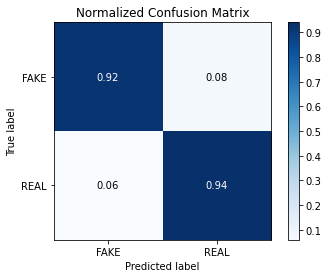

In [94]:
skplt.metrics.plot_confusion_matrix(true_labels,pred_labels, normalize=True)